In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import np_utils
import tensorflow as tf

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
# path to images



In [2]:
path = 'animals/'

# animal categories
categories = ['dogs', 'panda', 'cats']

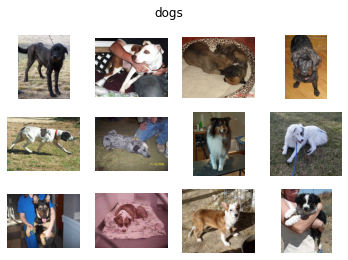

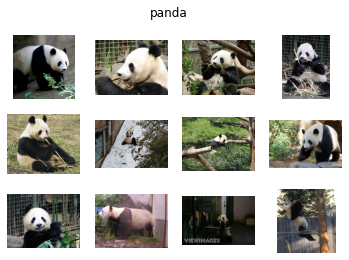

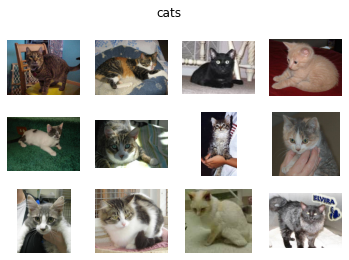

In [3]:
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [4]:
shape0 = []# height of image
shape1 = []# width of image

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []

dogs  => height min :  50 width min :  59
dogs  => height max :  500 width max :  500
panda  => height min :  87 width min :  78
panda  => height max :  1200 width max :  1600
cats  => height min :  32 width min :  55
cats  => height max :  500 width max :  500


In [5]:
# initialize the data and labels
data = [] # append all images (resize)
labels = []  # append the category /label of image
imagePaths = []   # append the path of each image 
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

print(imagePaths[:10])
import random
random.shuffle(imagePaths)
print(imagePaths[:10])


[['animals/dogs/dogs_00001.jpg', 0], ['animals/dogs/dogs_00002.jpg', 0], ['animals/dogs/dogs_00003.jpg', 0], ['animals/dogs/dogs_00004.jpg', 0], ['animals/dogs/dogs_00005.jpg', 0], ['animals/dogs/dogs_00006.jpg', 0], ['animals/dogs/dogs_00007.jpg', 0], ['animals/dogs/dogs_00008.jpg', 0], ['animals/dogs/dogs_00009.jpg', 0], ['animals/dogs/dogs_00010.jpg', 0]]
[['animals/dogs/dogs_00326.jpg', 0], ['animals/cats/cats_00879.jpg', 2], ['animals/dogs/dogs_00772.jpg', 0], ['animals/cats/cats_00592.jpg', 2], ['animals/cats/cats_00100.jpg', 2], ['animals/dogs/dogs_00769.jpg', 0], ['animals/cats/cats_00213.jpg', 2], ['animals/dogs/dogs_00823.jpg', 0], ['animals/dogs/dogs_00422.jpg', 0], ['animals/cats/cats_00316.jpg', 2]]


In [6]:

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)

In [7]:
data[0]

array([[[ 77,  83,  80],
        [ 89, 103, 102],
        [106, 113, 110],
        ...,
        [134, 116, 109],
        [216, 208, 194],
        [140, 138, 130]],

       [[ 87,  99,  93],
        [108, 152, 164],
        [100, 162, 169],
        ...,
        [116, 105, 105],
        [154, 146, 146],
        [118, 109, 106]],

       [[119, 135, 134],
        [ 88, 134, 135],
        [110, 183, 189],
        ...,
        [100,  84,  71],
        [182, 180, 179],
        [125, 121, 120]],

       ...,

       [[133, 198, 199],
        [ 90, 155, 159],
        [ 48,  94,  99],
        ...,
        [ 42,  54,  65],
        [ 46,  52,  51],
        [ 52,  46,  47]],

       [[112, 182, 182],
        [116, 186, 186],
        [111, 182, 182],
        ...,
        [ 29,  59,  70],
        [ 40,  65,  75],
        [ 35,  46,  50]],

       [[102, 173, 169],
        [104, 184, 178],
        [110, 187, 184],
        ...,
        [167, 232, 230],
        [ 28,  71,  86],
        [ 34,  47,  51]]

In [8]:
labels[0:5]# panda:1,cat:2,dog:0

[0, 2, 0, 2, 2]

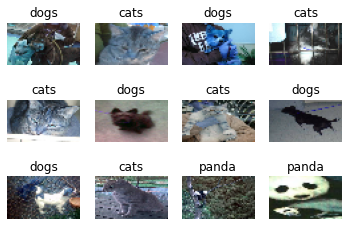

In [9]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0   # independent features
labels = np.array(labels)     # dependent features
# Let's check everything is ok
plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

In [10]:
data[0]
#len(data)

array([[[0.30196078, 0.3254902 , 0.31372549],
        [0.34901961, 0.40392157, 0.4       ],
        [0.41568627, 0.44313725, 0.43137255],
        ...,
        [0.5254902 , 0.45490196, 0.42745098],
        [0.84705882, 0.81568627, 0.76078431],
        [0.54901961, 0.54117647, 0.50980392]],

       [[0.34117647, 0.38823529, 0.36470588],
        [0.42352941, 0.59607843, 0.64313725],
        [0.39215686, 0.63529412, 0.6627451 ],
        ...,
        [0.45490196, 0.41176471, 0.41176471],
        [0.60392157, 0.57254902, 0.57254902],
        [0.4627451 , 0.42745098, 0.41568627]],

       [[0.46666667, 0.52941176, 0.5254902 ],
        [0.34509804, 0.5254902 , 0.52941176],
        [0.43137255, 0.71764706, 0.74117647],
        ...,
        [0.39215686, 0.32941176, 0.27843137],
        [0.71372549, 0.70588235, 0.70196078],
        [0.49019608, 0.4745098 , 0.47058824]],

       ...,

       [[0.52156863, 0.77647059, 0.78039216],
        [0.35294118, 0.60784314, 0.62352941],
        [0.18823529, 0

In [11]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)
# Preprocess class labels
print(trainY)
trainY = np_utils.to_categorical(trainY, 3)  # actual y 

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)
trainY

[0 2 1 ... 0 1 0]
(2400, 32, 55, 3)
(600, 32, 55, 3)
(2400, 3)
(600,)


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [12]:
model = Sequential()
#Conv2D(filters, kernel_size, strides=(1, 1),padding='valid', data_format=None, dilation_rate=(1, 1)activation=None, use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros', kernel_regularizer=None,bias_regularizer=None, activity_regularizer=None,kernel_constraint=None, bias_constraint=None)
model.add(Convolution2D(32, (2, 2), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
#On Line 1 we learn a total of 32 filters. 
#Max pooling is then used to reduce the spatial dimensions of the output volume.
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   # max value access from 2,2 matrix
model.add(Dropout(0.25))
model.add(Flatten()) # to convert array of image  into 1D
model.add(Dense(128, activation='relu'))# input layer


model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))# output layer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 54, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 26, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 13, 32)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 13, 32)         0         
                                                                 
 flatten (Flatten)           (None, 2912)              0

In [13]:
model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)

Epoch 1/25
75/75 [==============================] - 3s 30ms/step - loss: 0.9218 - accuracy: 0.5100
Epoch 2/25
75/75 [==============================] - 2s 30ms/step - loss: 0.7410 - accuracy: 0.6246
Epoch 3/25
75/75 [==============================] - 2s 30ms/step - loss: 0.6925 - accuracy: 0.6558
Epoch 4/25
75/75 [==============================] - 2s 31ms/step - loss: 0.6219 - accuracy: 0.7125
Epoch 5/25
75/75 [==============================] - 2s 30ms/step - loss: 0.5841 - accuracy: 0.7267
Epoch 6/25
75/75 [==============================] - 2s 31ms/step - loss: 0.5317 - accuracy: 0.7538
Epoch 7/25
75/75 [==============================] - 2s 31ms/step - loss: 0.5050 - accuracy: 0.7671 0s -
Epoch 8/25
75/75 [==============================] - 2s 30ms/step - loss: 0.4858 - accuracy: 0.7854
Epoch 9/25
75/75 [==============================] - 2s 31ms/step - loss: 0.4489 - accuracy: 0.8083 0s - loss: 0.4509 - accu
Epoch 10/25
75/75 [==============================] - 2s 30ms/step - loss: 0.435

C:\Users\ANIRBA~1\AppData\Local\Temp/ipykernel_92532/2605312693.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + categories)
C:\Users\ANIRBA~1\AppData\Local\Temp/ipykernel_92532/2605312693.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + categories)


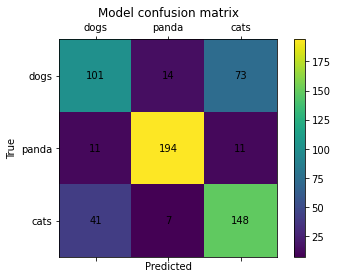

Accuracy : 73.83%


In [14]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

In [15]:
from keras.models import load_model

model.save('animalclassification.h5')

In [16]:
m = load_model('animalclassification.h5')
print(m)


In [17]:
from keras.models import load_model

m = load_model('animalclassification.h5')



In [20]:
import cv2
img = cv2.imread('animals/images/panda.jpg')
cv2.imshow('OutputImage',img)
cv2.waitKey(0)
HEIGHT = 32
WIDTH = 55
image = cv2.resize(img, (WIDTH, HEIGHT))  # .flatten()

image = np.array(image, dtype="float") / 255.0   # independent features
image = np.expand_dims(image, axis=0)
prediction= m.predict(image)

In [21]:
prediction

array([[1.3401161e-09, 1.0000000e+00, 4.5311701e-12]], dtype=float32)

In [22]:
from numpy import argmax

prediction
pred = argmax(prediction, axis=1) # return to label
pred

if pred == 0:
    print("Dog")
elif pred  == 1:
    print("Panda")
elif pred == 2:
    print('cat')
else:
    print("No Image Found")
    

Panda
